# Analyses with depth

We present functions to analyse how density and openness evolve with depth. <br> The analysis is performed for all data, then for deformation zones and fracture domains, and finally by orientation group.

### Python imports

In [1]:
import sys, os, math, numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path=r'python_functions'
sys.path.append(path)
import utils_borehole as uB
import utils_general_functions as uG

In [2]:
#ignore python warnings in the notebook
import warnings
warnings.filterwarnings('ignore')

### Import fracture dataset

In [3]:
# data inputs 
input_folder = r'input_data'
filename = 'p_frac_core_select'
all_data = pd.read_csv(os.path.join(input_folder,filename+str('.txt')), sep = ';')
all_data = all_data.sort_values(by = ['IDCODE','ADJUSTEDSECUP(m)']) #we make sure that the adjusted secup is in the right order

## 1 - Statistics by boreholes

The densities and open fraction are first calculated by boreholes.

### Borehole list

In [4]:
b_list = all_data.IDCODE.unique()

densities_analysis_all = pd.DataFrame() #to store all borehole data

### Loop over boreholes

In [5]:
for borehole in b_list:
    #select borehole data
    b_data = all_data.loc[all_data['IDCODE'] == borehole]
    
    # borehole analyser
    b_analysis = uB.BoreholeAnalysis(b_data)
    
    #compute density, open density, and openness
    densities_analysis = b_analysis.compute_density_along_borehole('smoothed', 10)
    densities_analysis = b_analysis.compute_density_along_borehole('smoothed', 10, frac_type = 'open')
    densities_analysis = b_analysis.compute_fop_along_borehole('smoothed')
    
    # we concatenate all the results
    densities_analysis_all = densities_analysis_all.append(densities_analysis, ignore_index=True)

### Mean and standard deviation with depth

Then the means and standard deviation of all borehole result is calculated in depth bins. <br> For this, we use the functon 'return_y_stat_for_xbin'

In [6]:
n_bin = 80
# fracture density
z_p32, p32_mean, p32_std = uG.return_ystat_for_xbin(n_bin, densities_analysis_all['z'], densities_analysis_all['p32'])
# openness
z_fop, fop_mean, fop_std = uG.return_ystat_for_xbin(n_bin, densities_analysis_all['z'], densities_analysis_all['fop'])

### Plots

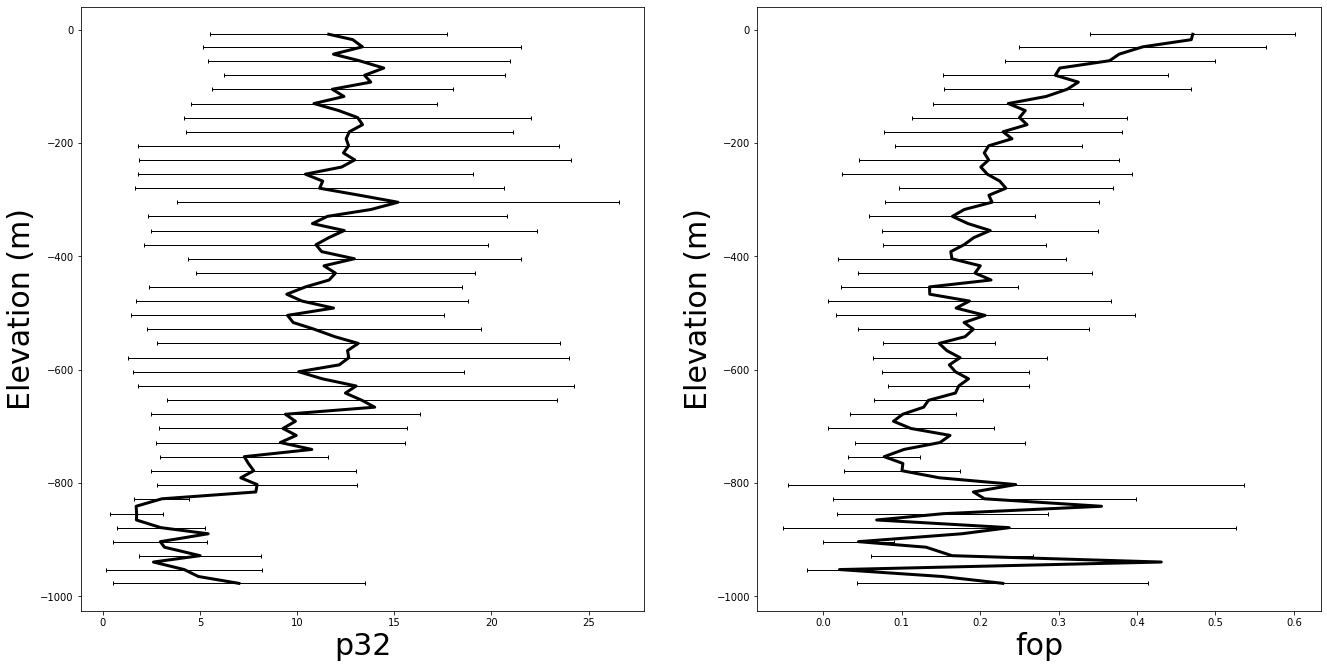

In [7]:
# plot
fig = plt.figure()
ax = plt.subplot(121)
ax.set_xlabel('p32', fontsize = 30)
ax.set_ylabel('Elevation (m)', fontsize = 30)

ax2 = plt.subplot(122)
ax2.set_xlabel('fop', fontsize = 30)
ax2.set_ylabel('Elevation (m)', fontsize = 30)

#plots
ax.errorbar(p32_mean, z_p32, xerr = p32_std, c = 'k', linewidth = 3, elinewidth=1, errorevery=2, capsize = 2, ecolor = 'k')
ax2.errorbar(fop_mean, z_fop, xerr = fop_std, c = 'k', linewidth = 3, elinewidth=1, errorevery=2, capsize = 2, ecolor = 'k')

#ax2.set_xscale('log')

fig.set_size_inches(1600./fig.dpi,800./fig.dpi)
plt.show()

## 2 - By Fracture domains and Deformation zones

### Fracture domains

In [8]:
densities_analysis_FFM = pd.DataFrame()
for borehole in b_list:
    b_data = all_data.loc[all_data['IDCODE'] == borehole]
    b_analysis = uB.BoreholeAnalysis(b_data)
    
    # the attribute lithology_type = 'FRACTURE_DOMAIN' is used
    densities_analysis = b_analysis.compute_density_along_borehole('smoothed', 10, lithology_type = 'FRACTURE_DOMAIN')
    densities_analysis = b_analysis.compute_density_along_borehole('smoothed', 10, frac_type = 'open', lithology_type = 'FRACTURE_DOMAIN')
    densities_analysis = b_analysis.compute_fop_along_borehole('smoothed')
    
    densities_analysis_FFM = densities_analysis_FFM.append(densities_analysis, ignore_index=True)

# Mean and standard deviation with depth
n_bin = 60
z_p32_FFM, p32_mean_FFM, p32_std_FFM = uG.return_ystat_for_xbin(n_bin, densities_analysis_FFM['z'], densities_analysis_FFM['p32'])
z_fop_FFM, fop_mean_FFM, fop_std_FFM = uG.return_ystat_for_xbin(n_bin, densities_analysis_FFM['z'], densities_analysis_FFM['fop'])

### Deformation zones

In [9]:
densities_analysis_DZ = pd.DataFrame()
for borehole in b_list:
    b_data = all_data.loc[all_data['IDCODE'] == borehole]
    b_analysis = uB.BoreholeAnalysis(b_data)
    
    # the attribute lithology_type = 'DEFORMATION_ZONE' is used
    densities_analysis = b_analysis.compute_density_along_borehole('smoothed', 10, lithology_type = 'DEFORMATION_ZONE')
    densities_analysis = b_analysis.compute_density_along_borehole('smoothed', 10, frac_type = 'open', lithology_type = 'DEFORMATION_ZONE')
    densities_analysis = b_analysis.compute_fop_along_borehole('smoothed')
    
    densities_analysis_DZ = densities_analysis_DZ.append(densities_analysis, ignore_index=True)

# Mean and standard deviation with depth
z_p32_DZ, p32_mean_DZ, p32_std_DZ = uG.return_ystat_for_xbin(n_bin, densities_analysis_DZ['z'], densities_analysis_DZ['p32'])
z_fop_DZ, fop_mean_DZ, fop_std_DZ = uG.return_ystat_for_xbin(n_bin, densities_analysis_DZ['z'], densities_analysis_DZ['fop'])

### Specific fracture domain: FFM01

In [10]:
densities_analysis_FFM01 = pd.DataFrame()
for borehole in b_list:
    b_data = all_data.loc[all_data['IDCODE'] == borehole]
    b_analysis = uB.BoreholeAnalysis(b_data)
    
    # the attribute lithology_name = 'FFM01' is used
    densities_analysis = b_analysis.compute_density_along_borehole('smoothed', 10, lithology_type = 'FRACTURE_DOMAIN', lithology_name = 'FFM01')
    densities_analysis = b_analysis.compute_density_along_borehole('smoothed', 10, frac_type = 'open', lithology_type = 'FRACTURE_DOMAIN', lithology_name = 'FFM01')
    densities_analysis = b_analysis.compute_fop_along_borehole('smoothed')
    
    # we concatenate all the results
    densities_analysis_FFM01 = densities_analysis_FFM01.append(densities_analysis, ignore_index=True)

# Mean and standard deviation with depth
z_p32_FFM01, p32_mean_FFM01, p32_std_FFM01 = uG.return_ystat_for_xbin(n_bin, densities_analysis_FFM01['z'], densities_analysis_FFM01['p32'])
z_fop_FFM01, fop_mean_FFM01, fop_std_FFM01 = uG.return_ystat_for_xbin(n_bin, densities_analysis_FFM01['z'], densities_analysis_FFM01['fop'])

### Plots

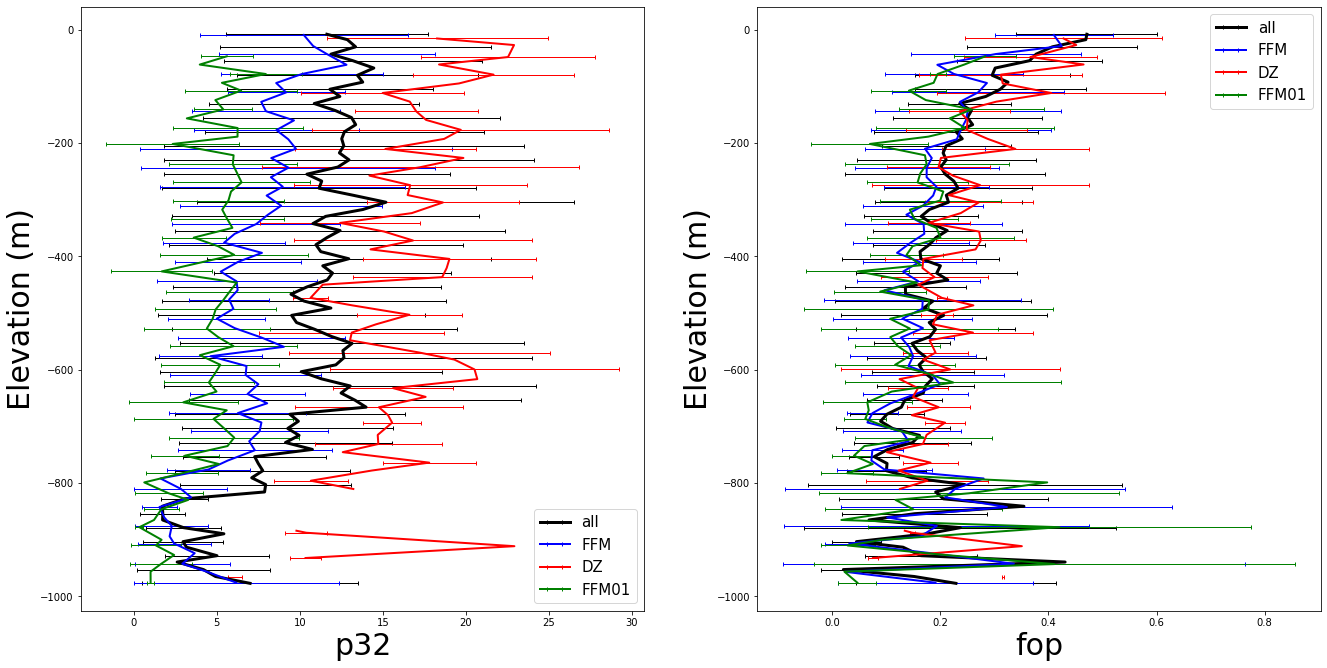

In [11]:
fig = plt.figure()
ax = plt.subplot(121)
ax.set_xlabel('p32', fontsize = 30)
ax.set_ylabel('Elevation (m)', fontsize = 30)

ax2 = plt.subplot(122)
ax2.set_xlabel('fop', fontsize = 30)
ax2.set_ylabel('Elevation (m)', fontsize = 30)

#plots
ax.errorbar(p32_mean, z_p32, xerr = p32_std, c = 'k', linewidth = 3, elinewidth=1, errorevery=2, capsize = 2, ecolor = 'k', label = 'all')
ax.errorbar(p32_mean_FFM, z_p32_FFM, xerr = p32_std_FFM, c = 'b', linewidth = 2, elinewidth=1, errorevery=2, capsize = 2, ecolor = 'b', label = 'FFM')
ax.errorbar(p32_mean_DZ, z_p32_DZ, xerr = p32_std_DZ, c = 'r', linewidth = 2, elinewidth=1, errorevery=2, capsize = 2, ecolor = 'r', label = 'DZ')
ax.errorbar(p32_mean_FFM01, z_p32_FFM01, xerr = p32_std_FFM01,  c = 'g', linewidth = 2, elinewidth=1, errorevery=2, capsize = 2, ecolor = 'g', label = 'FFM01')

ax2.errorbar(fop_mean, z_fop, xerr = fop_std, c = 'k', linewidth = 3, elinewidth=1, errorevery=2, capsize = 2, ecolor = 'k', label = 'all')
ax2.errorbar(fop_mean_FFM, z_fop_FFM, xerr = fop_std_FFM, c = 'b', linewidth = 2, elinewidth=1, errorevery=2, capsize = 2, ecolor = 'b', label = 'FFM')
ax2.errorbar(fop_mean_DZ, z_fop_DZ, xerr = fop_std_DZ, c = 'r', linewidth = 2, elinewidth=1, errorevery=2, capsize = 2, ecolor = 'r', label = 'DZ')
ax2.errorbar(fop_mean_FFM01, z_fop_FFM01, xerr = fop_std_FFM01, c = 'g', linewidth = 2, elinewidth=1, errorevery=2, capsize = 2, ecolor = 'g', label = 'FFM01')

ax.legend(fontsize = 15)
ax2.legend(fontsize = 15)
fig.set_size_inches(1600./fig.dpi,800./fig.dpi)
plt.show()

## 3 - And finally by orientation groups

### Horizontal fractures

In [16]:
ori_bin = {'dips': [0,20],'strikes': [0,360]}
densities_analysis_h = pd.DataFrame()

for borehole in b_list:
    b_data = all_data.loc[all_data['IDCODE'] == borehole]
    b_analysis = uB.BoreholeAnalysis(b_data)

    # the attribute 'orientation_bin' is used
    densities_analysis = b_analysis.compute_density_along_borehole('smoothed', 10, orientation_bin = ori_bin)
    densities_analysis = b_analysis.compute_density_along_borehole('smoothed', 10, frac_type = 'open', orientation_bin = ori_bin)
    densities_analysis = b_analysis.compute_fop_along_borehole('smoothed')

    densities_analysis_h = densities_analysis_h.append(densities_analysis, ignore_index=True)
 
n_bin = 60
z_p32_h, p32_mean_h, p32_std_h = uG.return_ystat_for_xbin(n_bin, densities_analysis_h['z'], densities_analysis_h['p32'])
z_fop_h, fop_mean_h, fop_std_h = uG.return_ystat_for_xbin(n_bin, densities_analysis_h['z'], densities_analysis_h['fop'])

### Vertical fractures (NW-SE)

In [17]:
ori_bin = {'dips': [65,90,65,90],'strikes': [90,180,270,360]}
densities_analysis_v1 = pd.DataFrame()

for borehole in b_list:
    b_data = all_data.loc[all_data['IDCODE'] == borehole]
    b_analysis = uB.BoreholeAnalysis(b_data)

    densities_analysis = b_analysis.compute_density_along_borehole('smoothed', 10, orientation_bin = ori_bin)
    densities_analysis = b_analysis.compute_density_along_borehole('smoothed', 10, frac_type = 'open', orientation_bin = ori_bin)
    densities_analysis = b_analysis.compute_fop_along_borehole('smoothed')

    densities_analysis_v1 = densities_analysis_v1.append(densities_analysis, ignore_index=True)
    
z_p32_v1, p32_mean_v1, p32_std_v1 = uG.return_ystat_for_xbin(n_bin, densities_analysis_v1['z'], densities_analysis_v1['p32'])
z_fop_v1, fop_mean_v1, fop_std_v1 = uG.return_ystat_for_xbin(n_bin, densities_analysis_v1['z'], densities_analysis_v1['fop'])

### Vertical fractures (NE-SW)

In [21]:
ori_bin = {'dips': [65,90,65,90],'strikes': [180,270,0,90]}
densities_analysis_v2 = pd.DataFrame()

for borehole in b_list:
    b_data = all_data.loc[all_data['IDCODE'] == borehole]
    b_analysis = uB.BoreholeAnalysis(b_data)

    densities_analysis = b_analysis.compute_density_along_borehole('smoothed', 10, orientation_bin = ori_bin)
    densities_analysis = b_analysis.compute_density_along_borehole('smoothed', 10, frac_type = 'open', orientation_bin = ori_bin)
    densities_analysis = b_analysis.compute_fop_along_borehole('smoothed')

    densities_analysis_v2 = densities_analysis_v2.append(densities_analysis, ignore_index=True)

z_p32_v2, p32_mean_v2, p32_std_v2 = uG.return_ystat_for_xbin(n_bin, densities_analysis_v2['z'], densities_analysis_v2['p32'])
z_fop_v2, fop_mean_v2, fop_std_v2 = uG.return_ystat_for_xbin(n_bin, densities_analysis_v2['z'], densities_analysis_v2['fop'])

### Plots

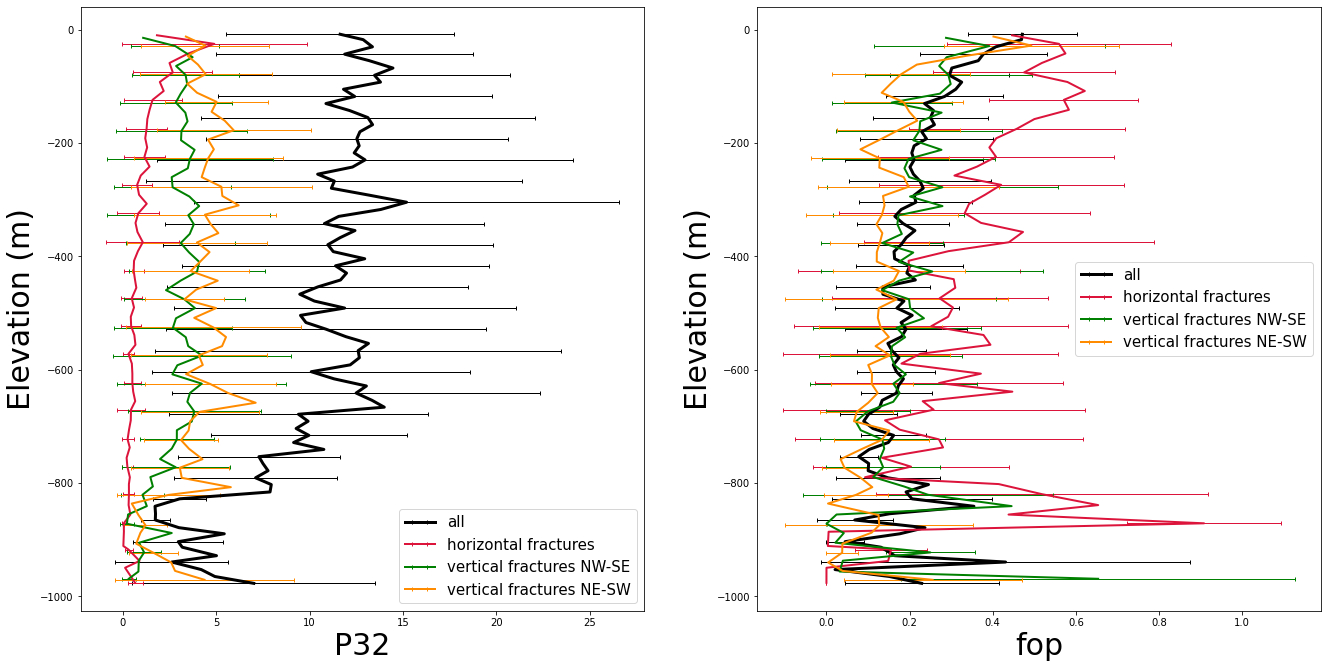

In [24]:
fig = plt.figure()
ax = plt.subplot(121)
ax.set_xlabel('P32', fontsize = 30)
ax.set_ylabel('Elevation (m)', fontsize = 30)

ax2 = plt.subplot(122)
ax2.set_xlabel('fop', fontsize = 30)
ax2.set_ylabel('Elevation (m)', fontsize = 30)

#plots
ax.errorbar(p32_mean, z_p32, xerr = p32_std, c = 'k', linewidth = 3, elinewidth=1, errorevery=3, capsize = 2, ecolor = 'k', label = 'all')
ax.errorbar(p32_mean_h, z_p32_h, xerr = p32_std_h, c = 'crimson', linewidth = 2, elinewidth=1, errorevery=3, capsize = 2, ecolor = 'crimson', label = 'horizontal fractures')
ax.errorbar(p32_mean_v1, z_p32_v1, xerr = p32_std_v1, c = 'green', linewidth = 2, elinewidth=1, errorevery=3, capsize = 2, ecolor = 'green', label = 'vertical fractures NW-SE')
ax.errorbar(p32_mean_v2, z_p32_v2, xerr = p32_std_v2,  c = 'darkorange', linewidth = 2, elinewidth=1, errorevery=3, capsize = 2, ecolor = 'darkorange', label = 'vertical fractures NE-SW')

ax2.errorbar(fop_mean, z_fop, xerr = fop_std, c = 'k', linewidth = 3, elinewidth=1, errorevery=3, capsize = 2, ecolor = 'k', label = 'all')
ax2.errorbar(fop_mean_h, z_fop_h, xerr = fop_std_h, c = 'crimson', linewidth = 2, elinewidth=1, errorevery=3, capsize = 2, ecolor = 'crimson', label = 'horizontal fractures')
ax2.errorbar(fop_mean_v1, z_fop_v1, xerr = fop_std_v1, c = 'green', linewidth = 2, elinewidth=1, errorevery=3, capsize = 2, ecolor = 'green', label = 'vertical fractures NW-SE')
ax2.errorbar(fop_mean_v2, z_fop_v2, xerr = fop_std_v2, c = 'darkorange', linewidth = 2, elinewidth=1, errorevery=3, capsize = 2, ecolor = 'darkorange', label = 'vertical fractures NE-SW')

ax.legend(fontsize = 15)
ax2.legend(fontsize = 15)
fig.set_size_inches(1600./fig.dpi,800./fig.dpi)
plt.show()